### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** `Lingpeng Xiao`
<br>
**Student ID(s):** `1025301`



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [1]:
#--IMPORTANT--#
#-- Please use 'pip install <missed-pakage>' to download the needed pakage. --#
#-- For loading the file, please put the .csv file and .ipynb file in the same folder --#
#-----------------------------------------------------------------------------#
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as m
from tabulate import tabulate
label_z = 0
label_o = 1

#This function convert all labels into 0 and 1
def convert_label(file):
    #For easier reading, change ">50K" to 1 and "<=50K" to 0
    file["label"] = file["label"].astype(str).str.replace(" >50K", "1")
    file["label"] = file["label"].astype(str).str.replace(" <=50K", "0")
    return file

# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
def preprocess(filename):
    data = pd.read_csv(filename)
    #Covert label into int
    data = convert_label(data)

    split_ratio = 0.9   #The length of the input file
    f_len = len(data) #File length
    split_num = split_ratio*f_len
    #Split data into tranning:%90, test:%10
    x_train = data.iloc[: int(split_num), : -1]
    x_test =  data.iloc[int(split_num) :, : -1]
    y_train = data.iloc[: int(split_num), -1:]
    y_test = data.iloc[int(split_num) :,-1:]
    return x_train, x_test, y_train, y_test

In [2]:
#This function will collect all nominal and numeric attributes
#Should iptut x_train
def collect_num_and_nom_atts(df):
    att_num = len(df.columns)   #Number of all columns(Include the label column)
    nom_atts = []
    num_atts = []
    for i in range(att_num):
        if(df.dtypes[i] == 'O'):
            nom_atts.append(df.columns[i])
        else:
            num_atts.append(df.columns[i])
    return nom_atts, num_atts


In [3]:
#Calculate log prior probabilities
def calculate_log_prior(data, label):
    count = 0
    log_prior = 0
    for i in range(len(data)):
        if(data['label'].iloc[i] == label):
            count +=1 

    log_prior = np.log(count/len(data))

    return log_prior

#Calculate log standard deviation and mean
#Input should be x&y_data, " att" and "0/1"
def calculate_sd_and_mean(x_data, y_data, att, label):
    count = 0
    sd = 0
    sum = 0
    atts = []
    #Loop the data, add values
    for i in range(len(x_data)):
        #Only add a value if it's picked and not ? 
        if(y_data["label"].iloc[i] == label and x_data[att].iloc[i] != "?"):
            count +=1 
            atts.append(x_data[att].iloc[i])
    mean = np.mean(atts)

    for i in range(count):
        sum += m.pow((atts[i]-mean), 2)
    sd = m.sqrt(sum / (count - 1))

    return sd, mean   


In [4]:
#Store mean and sd of all num attributes
#i.e. 'age', 'education num', 'hours per week'
def store_sd_and_mean(x_train, y_train, num_atts):
    zero_mean_list = []
    zero_sd_list = []
    one_mean_list = []
    one_sd_list = []
    dataframe_list = []

    #Calculate standard deviation and mean 
    for att in num_atts:
        z_sd, z_mean = calculate_sd_and_mean(x_train, y_train, att, "0")
        zero_sd_list.append(z_sd) 
        zero_mean_list.append(z_mean) 

        o_sd, o_mean = calculate_sd_and_mean(x_train, y_train, att, "1")
        one_sd_list.append(o_sd) 
        one_mean_list.append(o_mean)

    #Store these lists in a dataframe
    dataframe_list.append(zero_sd_list)
    dataframe_list.append(zero_mean_list)
    dataframe_list.append(one_sd_list)
    dataframe_list.append(one_mean_list)

    #Build dataframe
    data_frame = pd.DataFrame(dataframe_list, 
    index = ["zero_sd", "zero_mean", "one_sd", "one_mean"],
    columns=num_atts)
    return  data_frame


#Count the 0s and 1s of input y_data
def count_zeros_and_ones(y_data):
    zero_count = 0
    one_count = 0

    for i in range(len(y_data)):
        if(y_data["label"].iloc[i] == "0"):
            zero_count += 1
        else:
            one_count += 1
    
    return zero_count, one_count


#Count the likelihood of a specific value of nominal attributs under Y and N conditions
#Should input x&&y_data, att, " value", sum of 0s&&1s
def count_nom_likeliood(x_data, y_data, att, value, z_num, o_num):
    one_sum = 0
    zero_sum = 0
    total_sum = 0
    z_freq = 0
    o_freq = 0
    #Count the total labels number and each labels number
    for i in range(len(x_data)):
        if(x_data[att].iloc[i] == value and y_data['label'].iloc[i] == "0"):
            zero_sum += 1
            total_sum += 1
        elif(x_data[att].iloc[i] == value and y_data['label'].iloc[i] == "1"):
            one_sum += 1
            total_sum += 1
    #Calculate label 0 and 1's log frequency
    #Ignore result 0 
    if (zero_sum/z_num != 0 and one_sum/o_num != 0):
        z_freq = np.log(zero_sum/z_num)
        o_freq = np.log(one_sum/o_num)

    return z_freq, o_freq


#Store all the likelihoods of all nomial attributes in a dataframe
def store_nom_likelihood(x_data, y_data):
    whole_lh_list = []
    nom_atts, num_atts = collect_num_and_nom_atts(x_data)
    zero_count, one_count = count_zeros_and_ones(y_data)
    
    #Add all nominal likelihoods into whole_lh_list
    #Loop the nominal attributes
    for att in nom_atts:
        value_list = list(set(x_train[att]))    #The unique attributes
        z_lh_list = []
        o_lh_list = []
        #Loop the unique attributes
        for val in value_list:
            z_freq, o_freq = count_nom_likeliood(x_train, y_train, att, val, zero_count, one_count)
            #Stroe the current 0 and 1 likelihood into seperate lists
            z_lh_list.append(z_freq)
            o_lh_list.append(o_freq)
        #Store the 0 and 1 likelihood as a pair
        whole_lh_list.append((z_lh_list, o_lh_list))

    #Add whole_lh_list into a dataframe
    data_frame = []
    for i in range(len(whole_lh_list)):
        df = pd.DataFrame([whole_lh_list[i][0], whole_lh_list[i][1]], columns=[list(set(x_train[nom_atts[i]]))])
        data_frame.append(df)
    return data_frame



In [5]:
# This function should calculate prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model
def train(x_train,y_train):
    label_val1 = "0"
    label_val2 = "1"
    nom_atts, num_atts = collect_num_and_nom_atts(x_train)

    log_prior_zero = calculate_log_prior(y_train, label_val1)
    log_prior_one = calculate_log_prior(y_train, label_val2)
    prior = pd.DataFrame([log_prior_zero,log_prior_one], columns=["log_prior"])
    
    df_sd_mean = store_sd_and_mean(x_train, y_train, num_atts)
    df_nom_lh = store_nom_likelihood(x_train, y_train)
   
    return prior, df_sd_mean, df_nom_lh



In [6]:
#Find the position of the numeric and nominal dttributes
def detect_nom_and_num_index(x_data):
    nom_index_list = []
    num_index_list = []

    for i in range(len(x_data.columns)):
        if(x_data.dtypes[i] == "O"):
            nom_index_list.append(i)
        else:
            num_index_list.append(i)
    
    return nom_index_list, num_index_list 

#Calculate log gaussian pdf
def calculate_num_likelihood(sd, mean, x_data):
    coefficient = 0
    power = 0
    result = 0
    #Don't do anything with "?"
    if(x_data != "?"):
        coefficient = 1/(sd*m.sqrt(2*m.pi))
        power = -0.5*(m.pow(((x_data - mean) / sd), 2))

        if(coefficient*pow(m.e, power) == 0):
            result = 0
        else:
            result = np.log(coefficient*pow(m.e, power))

    return result

In [7]:

#Sum the numeric likelihood of a single instance's numbers
def sum_num_likelihood(num_atts_df, df_sd_mean):
    zero_lh = 0
    one_lh = 0
    
    for i in range(len(num_atts_df)):
        x_value = num_atts_df[i]

        #Calculate likelihood of label 0 
        zero_sd = df_sd_mean[num_atts_df.index[i]][label_z]
        zero_mean = df_sd_mean[num_atts_df.index[i]][label_o]
        zero_lh += calculate_num_likelihood(zero_sd, zero_mean, x_value)

        #Calculate likelihood of label 1 
        one_sd = df_sd_mean[num_atts_df.index[i]][label_z+2]
        one_mean = df_sd_mean[num_atts_df.index[i]][label_o+2]
        one_lh += calculate_num_likelihood(one_sd, one_mean, x_value)
    
    return zero_lh, one_lh

#Sum the nominal likelihood of a single instance
def sum_nom_likelihood(nom_para, df_nom_lh):
    zero_lh = 0
    one_lh = 0
    nom_atts, num_atts = collect_num_and_nom_atts(x_train)
    
    #Loop the nominal parameter
    for i in range(len(nom_atts)):
        x_value = nom_para[i]
        #If the current parameter exits in the test case
        #calculate the likelihood
        if(x_value in df_nom_lh[i].columns):    
            zero_lh += df_nom_lh[i][x_value].iloc[label_z][0]
            one_lh += df_nom_lh[i][x_value].iloc[label_o][0]
    
    return zero_lh, one_lh


# This function should predict classes for new items in the testing data
def predict(x_test, prior, df_sd_mean, df_nom_lh):
    predict_list = []
    c_list = []
    z_o_c_list =[]
    nom_index_list, num_index_list = detect_nom_and_num_index(x_train)
    
    #Log prior for 1 and 0
    zero_prior = prior["log_prior"][label_z]
    one_prior =  prior["log_prior"][label_o]

    for i in range(len(x_test)):
        #Nom and num likelihood of a single instance
        zero_num_lh, one_num_lh = sum_num_likelihood(x_test.iloc[i, num_index_list], df_sd_mean)
        zero_nom_lh, one_nom_lh = sum_nom_likelihood(x_test.iloc[i, nom_index_list], df_nom_lh)
        
        #Final posibility of zero and one of a single instance
        zero_post_prior = zero_prior + zero_num_lh + zero_nom_lh
        one_post_prior = one_prior + one_num_lh + one_nom_lh
        #Store zero and one post prior in pairs
        z_o_c_list.append([zero_post_prior,one_post_prior])

        #Store the prediction (the higher posibility result)
        if(zero_post_prior > one_post_prior):
            predict_list.append(label_z)
            c_list.append(zero_post_prior)
        else:
            predict_list.append(label_o)
            c_list.append(one_post_prior)

    return predict_list, c_list, z_o_c_list


In [8]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.

def evaluate(predict_list, y_test):
    #P = 0; N = 1
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    #Count each element of confussion table
    for i in range(len(predict_list)):
        if(predict_list[i] == 0 and y_test["label"].iloc[i] == "0"):
            TP += 1
        elif(predict_list[i] == 0 and y_test["label"].iloc[i] == "1"):
            FP += 1
        elif(predict_list[i] == 1 and y_test["label"].iloc[i] == "1"):
            TN += 1
        else:
            FN += 1

    #Calculte the ouput values
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    matrix = np.matrix([[TP,FN],[FP,TN]])
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    f_score = (2 * precision * recall)/(precision + recall)

    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f_score}")
    print(f"Confusion matrix: \n{matrix}") 
    return accuracy, f_score, matrix


In [9]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation results. [0.33 marks]
def convert_label_back(label):
    if(label == 0):
        return "<=50K"
    elif(label == 1):
        return ">50K"


# First, read in the data and apply your NB model to the ADULT data
file = "adult.csv"
x_train, x_test, y_train, y_test = preprocess(file)
prior, df_sd_mean, df_nom_lh = train(x_train,y_train)
predict_list, c_list,z_o_c_list = predict(x_test, prior, df_sd_mean, df_nom_lh)

# Second, print the full evaluation results from the evaluate() function
accuracy, f_score, matrix =  evaluate(predict_list, y_test)


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)
print("Attribute vectors of instances [0, 1, 2]: ") # of the first three records in adult.csv
display(x_train.head(3))

print(f"\nNumber of instances (N): {len(x_train)+len(x_test)}")
print(f"Number of attributes (F): {len(x_train.columns)}")
print("Number of labels (L): ", len(set(y_test["label"])))


# print out the prediction results of the last three instances
pre_label1 = convert_label_back(predict_list[-1])
pre_label2 = convert_label_back(predict_list[-2])
pre_label3 = convert_label_back(predict_list[-3])

print(f"\n\nPredicted class log-probabilities for instance N-3: <=50K: {z_o_c_list[-3][0]}, >50K: {z_o_c_list[-3][1]}")
print("Predicted class ID for instance N-3: ", pre_label3)
print(f"\nPredicted class log-probabilities for instance N-2: <=50K: {z_o_c_list[-2][0]}, >50K: {z_o_c_list[-2][1]}")
print("Predicted class ID for instance N-2: ", pre_label2)
print(f"\nPredicted class log-probabilities for instance N-1: <=50K: {z_o_c_list[-1][0]}, >50K: {z_o_c_list[-1][1]}")
print("Predicted class ID for instance N-1: ", pre_label1)


Accuracy: 0.86
F1 score: 0.9078947368421053
Confusion matrix: 
[[69  8]
 [ 6 17]]
Attribute vectors of instances [0, 1, 2]: 


,age,work class,education,education num,marital status,occupation,relationship,race,sex,hours per week,native country (region)
0,68,?,1st-4th,2,Divorced,?,Not-in-family,White,Female,20,United-States
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States



Number of instances (N): 1000
Number of attributes (F): 11
Number of labels (L):  2


Predicted class log-probabilities for instance N-3: <=50K: -20.716896981933054, >50K: -19.556273652832147
Predicted class ID for instance N-3:  >50K

Predicted class log-probabilities for instance N-2: <=50K: -25.339070637730188, >50K: -22.744589775643142
Predicted class ID for instance N-2:  >50K

Predicted class log-probabilities for instance N-1: <=50K: -16.852794958645738, >50K: -16.716481989445864
Predicted class ID for instance N-1:  >50K


## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

In [10]:

#The cell displays the quantity of label values in
#y_test and y_train
TP = matrix[0, 0]
FN = matrix[0, 1]
FP = matrix[1, 0]
TN = matrix[1, 1]

#Display the evaluation results
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
# assign data
mydata1 = [["Sensitivity"] + [sensitivity]]
mydata2 = [["Specificity"] + [specificity]]
mydata_tt = mydata1 + mydata2
# display table
print(tabulate(mydata_tt, tablefmt="grid"))

#Count the label distribution
def count_labels(dataset):
    count_zero = 0
    count_one = 0
    #Find the number of 0 and 1
    for i in range(len(dataset)):
        if(y_train["label"].iloc[i] == "0"):
            count_zero += 1
        elif(y_train["label"].iloc[i] == "1"):
            count_one += 1

    return count_zero, count_one

train_zeros, train_ones = count_labels(y_train)
test_zeros, test_ones = count_labels(y_test)

#Display the label distribution
# assign data
mydata1 = [[" <=50K"] + [train_zeros] + [test_zeros] ]
mydata2 = [[" >50K"] + [train_ones] + [test_ones]]
mydata_tt = mydata1 + mydata2
# create header
head = [" "] + ["Train data"]+ ["Test data"]
# display table
print(tabulate(mydata_tt, headers=head, tablefmt="grid"))


+-------------+----------+
| Sensitivity | 0.896104 |
+-------------+----------+
| Specificity | 0.73913  |
+-------------+----------+
+-------+--------------+-------------+
|       |   Train data |   Test data |
+=======+==============+=============+
| <=50K |          692 |          75 |
+-------+--------------+-------------+
| >50K  |          208 |          25 |
+-------+--------------+-------------+


Sensitivity shows the ability of a model to detect the proportion of true positive cases. And, specificity shows the ability about detecting the true negative cases. According to the results, the sensitivity is a bit higher than the specificity, the difference is around 0.1. It means this model performs better in predicting true positive cases.    

Based on the data distribution, the overall ratio of label values in the dataset is about 3(<=50K):1(>50K). It means the prior possibility of (<=50K) is greater, and the value of TP will be greater than TN as well. According to the formulas, the model may tend to predict the label as "<=50K" due to the greater prior. This may also cause the value of sensitivity to be greater than Specificity because the sensitivity has a greater numerator.

For improving this model, balanced labels might be helpful. For example, when there are other extra instances, it's good to pick more data of label ">50K". On the other hand, picking more instances without missing attributes may also improve the model.

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

In [11]:
#This fucntion calculate Gussian pdf
def calculate_g_pdf(x, xi, bandwidth):
    coefficient = 0
    power = 0
    result = 0
    #Don't do anything with "?"
    if(x != "?" and xi != "?"):
        coefficient = 1/(bandwidth*m.sqrt(2*m.pi))
        power = -0.5*(m.pow(((x - xi) / bandwidth), 2))
        result = coefficient*pow(m.e, power)
    
    return result

#This function calculate KDE pdf
def calculate_KDE_pdf(x, bandwidth, label_atts):
    KDE_list = []
    mean = 0
    #label_atts inlcudes the rows of the same label(0/1)
    #Loop the label_atts, calculate the gaussian pdf of each x_value
    for x_value in label_atts.index:
        xi = label_atts[x_value]
        #Add the result into the list
        KDE_list.append(calculate_g_pdf(x, xi, bandwidth))

    mean = np.mean(KDE_list)    #The mean of the list
    if(mean == 0):
        return 0
    else:
        return np.log(mean)

#This function store the KED likelihood in a dataframe
def store_KED_likelihood(x_train, x_test, y_train, num_atts, bandwidth):
    para_list = []
    zero_index = y_train.loc[y_train["label"] == "0"].index
    one_index = y_train.loc[y_train["label"] == "1"].index
    
    #Find each attrtribute with specific labels (0/1) 
    for att in num_atts:
        zero_att = x_train.loc[zero_index, att]
        one_att = x_train.loc[one_index, att]

        zero_list = []
        one_list = []

        #Calculate total KDE pdf, the cluster is based on label
        for i in x_test.index:
            x = x_test[att][i]

            zero_list.append(calculate_KDE_pdf(x, bandwidth, zero_att))
            one_list.append(calculate_KDE_pdf(x, bandwidth, one_att))
        #Add result into a list
        para_list.append(zero_list)
        para_list.append(one_list)
    #Make the list a dataframe
    dataframe = pd.DataFrame(para_list, index = ["zero_age", "one_age", "zero_education", "one_education", "zero_h_per_w", "one_h_per_w"])
    return dataframe


In [12]:

# This function should calculate prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model
def train_KDE(x_train, x_test, y_train, bandwidth):
    label_val1 = "0"
    label_val2 = "1"
    nom_atts, num_atts = collect_num_and_nom_atts(x_train)

    log_prior_zero = calculate_log_prior(y_train, label_val1)
    log_prior_one = calculate_log_prior(y_train, label_val2)
    prior = pd.DataFrame([log_prior_zero,log_prior_one], columns=["log_prior"])
    
    df_KDE_lh = store_KED_likelihood(x_train, x_test, y_train, num_atts, bandwidth)
    df_nom_lh = store_nom_likelihood(x_train, y_train)
   
    return prior, df_KDE_lh, df_nom_lh

# This function should predict classes for new items in the testing data
def predict_KDE(x_test, prior, df_KDE_lh, df_nom_lh):
    predict_list = []
    c_list = []
    z_o_c_list =[]
    nom_index_list, num_index_list = detect_nom_and_num_index(x_train)
    
    #Log prior for 1 and 0
    zero_prior = prior["log_prior"][label_z]
    one_prior =  prior["log_prior"][label_o]

    for i in range(len(x_test)):
        #Nom and num likelihood of a single instance
        zero_num_lh = df_KDE_lh[i]["zero_age"] + df_KDE_lh[i]["zero_education"] + df_KDE_lh[i]["zero_h_per_w"]
        one_num_lh = df_KDE_lh[i]["one_age"] + df_KDE_lh[i]["one_education"] + df_KDE_lh[i]["one_h_per_w"]
        zero_nom_lh, one_nom_lh = sum_nom_likelihood(x_test.iloc[i, nom_index_list], df_nom_lh)
        
        #Final posibility of zero and one of a single instance
        zero_post_prior = zero_prior + zero_num_lh + zero_nom_lh
        one_post_prior = one_prior + one_num_lh + one_nom_lh
        #Store zero and one post prior in pairs
        z_o_c_list.append([zero_post_prior,one_post_prior])

        #Store the prediction (the higher posibility result)
        if(zero_post_prior > one_post_prior):
            predict_list.append(label_z)
            c_list.append(zero_post_prior)
        else:
            predict_list.append(label_o)
            c_list.append(one_post_prior)

    return predict_list, c_list, z_o_c_list

#This function used the previous evlauate function to calculate the 
#accuracy, F-score and confusion table matrix
def evalueate_KDE(x_train, x_test, y_train, y_test, bandwidth):
    prior_KDE, df_KDE_lh, df_nom_lh = train_KDE(x_train, x_test, y_train, bandwidth)
    predict_list_KDE, c_list_KDE, z_o_c_list_KDE = predict_KDE(x_test, prior_KDE, df_KDE_lh, df_nom_lh)
    accuracy_KDE, f_score_KDE, matrix_KDE =  evaluate(predict_list_KDE, y_test)
    return accuracy_KDE, f_score_KDE, matrix_KDE


Accuracy: 0.86
F1 score: 0.9066666666666665
Confusion matrix: 
[[68  9]
 [ 5 18]]
Accuracy: 0.81
F1 score: 0.8689655172413794
Confusion matrix: 
[[63 14]
 [ 5 18]]
Accuracy: 0.82
F1 score: 0.8750000000000001
Confusion matrix: 
[[63 14]
 [ 4 19]]
Accuracy: 0.81
F1 score: 0.8671328671328672
Confusion matrix: 
[[62 15]
 [ 4 19]]
Accuracy: 0.82
F1 score: 0.8750000000000001
Confusion matrix: 
[[63 14]
 [ 4 19]]


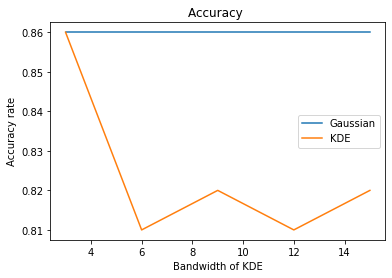

In [13]:
#This cell is used to detect the results of KED and Gaussian algorithm
#and discuss their differences 
#Check the evaluation from bandwidth 3 to 15, gap is 3.
accuracy_KDE_list = []
for i in range(3, 16, 3):
    accuracy_KDE, f_score_KDE, matrix_KDE = evalueate_KDE(x_train, x_test, y_train, y_test, i)
    accuracy_KDE_list.append(accuracy_KDE)


x = np.arange(3, 16, 3) 
y1 = [accuracy]*5
y2 = np.array(accuracy_KDE_list)
# PLot
plt.plot(x, y1) 
plt.plot(x, y2)

# Add Title
plt.title("Accuracy ") 

# Add Axes Labels and legend
plt.xlabel("Bandwidth of KDE") 
plt.ylabel("Accuracy rate") 
plt.legend(['Gaussian','KDE'])
# Display
plt.show()

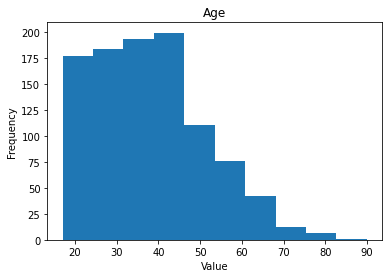

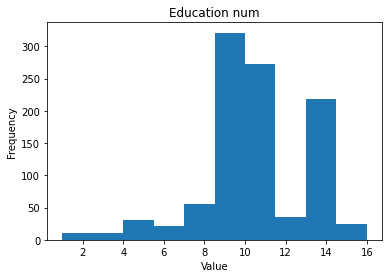

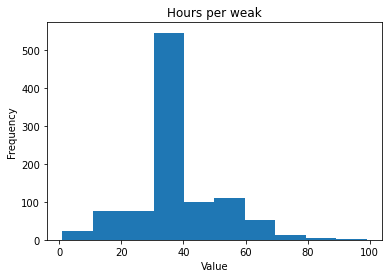

In [14]:
#This cell shows the plots of numeric attributes
#Can obersve the disttributions of those values
age_list = []
education_num_list = []
h_per_w_list = []
num_locs = []
nom_locs = []
nom_locs, num_locs = detect_nom_and_num_index(x_train)

#Store all the numeric attributes of all instances
with open("adult.csv",'r') as f: #No need to close file when using 'with ... as ...'s
    f.readline()    #Ignore the first line
    for line in f:
        att_vals = line.strip().split(",")
        currrent_round = 0
        for loc in num_locs:
            #Ignore "?"
            if(not(att_vals[loc]) == "?"):
                if currrent_round == 0: age_list.append(float(att_vals[loc]))
                elif currrent_round == 1: education_num_list.append(float(att_vals[loc]))
                elif currrent_round == 2: h_per_w_list.append(float(att_vals[loc]))
            currrent_round += 1

#Plot numeric data
#Observe their data distributions
plt.title("Age")
plt.hist(np.array(age_list))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.title('Education num')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(np.array(education_num_list))
plt.show()

plt.title('Hours per weak')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(np.array(h_per_w_list))
plt.show()

In [15]:
# This function should evaliate the prediction performance by comparing the model’s class outputs to ground
# truth labels, return and output accuracy, recall and specificity

def evaluate_cv(predict_list, y_test):
    #P = 0; N = 1
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    #Count each element of confussion table
    for i in range(len(predict_list)):
        if(predict_list[i] == 0 and y_test["label"].iloc[i] == "0"):
            TP += 1
        elif(predict_list[i] == 0 and y_test["label"].iloc[i] == "1"):
            FP += 1
        elif(predict_list[i] == 1 and y_test["label"].iloc[i] == "1"):
            TN += 1
        else:
            FN += 1

    #Calculte the ouput values
    accuracy_cv = (TP + TN)/(TP + TN + FP + FN)
    recall_cv = TP/(TP + FN)
    specificity_cv = TN / (TN + FP)

    return accuracy_cv, recall_cv, specificity_cv


#This function build the k-fold cross validation model
def kf_cv_model(filename, k):
    file = pd.read_csv(filename)
    
    #Covert label into int
    file = convert_label(file)
    file_len = len(file)    #The number of rows
    split_rate = 1/k
    fold_size = split_rate*file_len   #The size of each fold

    accuracy_cv_list = []
    recall_cv_list = []
    specificity_cv_list = []

    for i in range(k):
        test_index = []
        #The rows index of the test data
        test_index = list(range(int(i * fold_size), int((i+1) * fold_size)))
        #The rows index of the train data
        train_index = file.index.drop(test_index)

        #Split the data
        x_train_cv = file.iloc[train_index, : -1]
        x_test_cv =  file.iloc[test_index, : -1]
        y_train_cv = file.iloc[train_index, -1:]
        y_test_cv = file.iloc[test_index, -1:]

        #Do the train(), predict() and evaluate()
        prior_cv, df_sd_mean_cv, df_nom_lh_cv = train(x_train_cv, y_train_cv)
        predict_list_cv, c_list_cv,z_o_c_list_cv = predict(x_test_cv, prior_cv, df_sd_mean_cv, df_nom_lh_cv)
        accuracy_cv, recall_cv, specificity_cv =  evaluate_cv(predict_list_cv, y_test_cv)

        #Store the ressult into lists
        accuracy_cv_list.append(accuracy_cv)
        recall_cv_list.append(recall_cv)
        specificity_cv_list.append(specificity_cv)

    return accuracy_cv_list, recall_cv_list, specificity_cv_list

In [16]:
#Run the 10-fold CV nad 2-dold CV, store the outputsseperately
accuracy_cv_list_10, recall_cv_list_10, specificity_cv_list_10 = kf_cv_model("adult.csv", 10)
accuracy_cv_list_2, recall_cv_list_2, specificity_cv_list_2 = kf_cv_model("adult.csv", 2)

In [17]:
#The result of 10-fold cross validation
# assign data
mydata_ten = [["Accuracy"] + accuracy_cv_list_10] + [["Recall"] + recall_cv_list_10] + [["Specificity"] + specificity_cv_list_10]
# create header
head_ten = ["Execute order"] + list(range(1,11)) 
# display table
print(tabulate(mydata_ten, headers=head_ten, tablefmt="grid"))

#The comparison between 2-fold and 10-fold
# assign data
mydata1 = [["10-fold CV"] + [np.mean(accuracy_cv_list_10)] + [np.mean(recall_cv_list_10)] + [np.mean(specificity_cv_list_10)]]
mydata2 = [["2-fold CV"] + [np.mean(accuracy_cv_list_2)] + [np.mean(recall_cv_list_2)] + [np.mean(specificity_cv_list_2)]]
mydata_tt = mydata1 + mydata2
# create header
head = [" "] + ["Accuracy"]+ ["Recall"] + ["Specificity"]
# display table
print(tabulate(mydata_tt, headers=head, tablefmt="grid"))

+-----------------+------+----------+----------+----------+------+----------+----------+----------+----------+----------+
| Execute order   |    1 |        2 |        3 |        4 |    5 |        6 |        7 |        8 |        9 |       10 |
+=================+======+==========+==========+==========+======+==========+==========+==========+==========+==========+
| Accuracy        | 0.79 | 0.84     | 0.8      | 0.86     | 0.86 | 0.82     | 0.81     | 0.78     | 0.81     | 0.86     |
+-----------------+------+----------+----------+----------+------+----------+----------+----------+----------+----------+
| Recall          | 0.76 | 0.833333 | 0.818182 | 0.87013  | 0.9  | 0.835443 | 0.844156 | 0.815789 | 0.849315 | 0.896104 |
+-----------------+------+----------+----------+----------+------+----------+----------+----------+----------+----------+
| Specificity     | 0.88 | 0.863636 | 0.73913  | 0.826087 | 0.7  | 0.761905 | 0.695652 | 0.666667 | 0.703704 | 0.73913  |
+-----------------+-----

(a) 
Based on the "Accuracy" plot, the Gaussian algorithm has higher overall accuracy than the KDE algorithm, besides the case when the bandwidth is 3. The KED algorithm's accuracy shifts around 0.82, while the Gaussian algorithm's accuracy is 0.86. This phenomenon reveals that the Gaussian algorithm performs better in this dataset.

By observing the histograms of the numeric attributes, their overall distributions are a bit similar to the Gaussian distribution, especially the "Age" and "Hours per week". Since Gaussian naive Bayes usually performs better in predicting data with Gaussian distribution, the Gaussian algorithm has higher accuracy and it's more suitable for this dataset. However, when the data distribution is far from the Gaussian distribution, KED naive Bayes may perform better. 

(b)
By observing the first table, the 10-fold CV's accuracy, recall, and specificity are about 0.8. And the second table shows the 2-fold CV performs a bit better than the 10-fold CV. That shows that a less m value may lead to a better result, but it is hard to determine if it's a coincidence. The greater m may display a worse result, but it's closer to the realistic performance of the model since it trains more data and tests more times. Furthermore, the increasing value of m will also lead to a longer execution time, so it's important to pick a proper m value. 

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

In [18]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [19]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Lingpeng Xiao 1025301]
   
   <b>Dated</b>: [2022/Apr./03]